# Morsy 6/29/20
## Speckle Image Process

### 1. Image Read

In [1]:
import numpy as np
import supreme as sp

In [2]:
(dx_m, Dx_m, f_cpm, px_size_m, x_m, Nfft, df_cpm, Df_cpm) = sp.setfreq(1*10**-6, 1e-3)
im_dic = {}

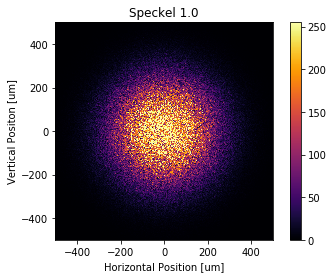

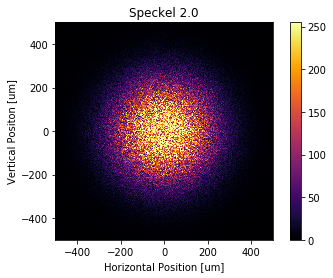

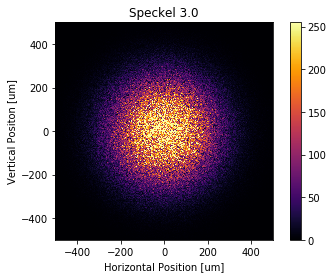

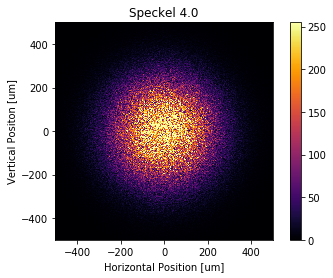

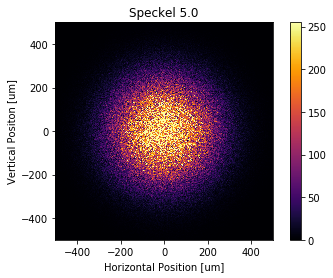

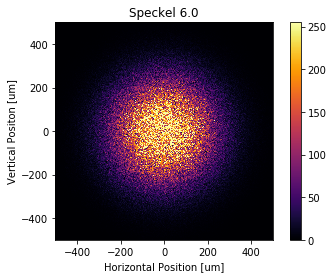

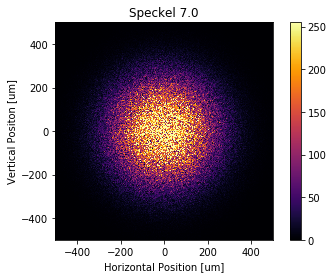

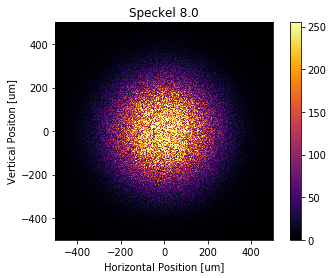

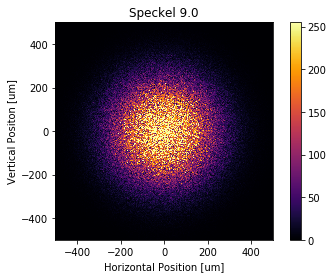

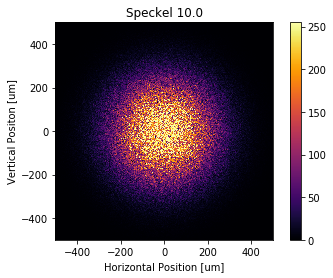

{'spk_1.0': <PIL.PngImagePlugin.PngImageFile image mode=L size=1000x1000 at 0x1BBC91C1BE0>, 'spk_2.0': <PIL.PngImagePlugin.PngImageFile image mode=L size=1000x1000 at 0x1BBC80AD668>, 'spk_3.0': <PIL.PngImagePlugin.PngImageFile image mode=L size=1000x1000 at 0x1BBC927F080>, 'spk_4.0': <PIL.PngImagePlugin.PngImageFile image mode=L size=1000x1000 at 0x1BBC92DF5F8>, 'spk_5.0': <PIL.PngImagePlugin.PngImageFile image mode=L size=1000x1000 at 0x1BBC9247B70>, 'spk_6.0': <PIL.PngImagePlugin.PngImageFile image mode=L size=1000x1000 at 0x1BBCA556CF8>, 'spk_7.0': <PIL.PngImagePlugin.PngImageFile image mode=L size=1000x1000 at 0x1BBCA5BAAC8>, 'spk_8.0': <PIL.PngImagePlugin.PngImageFile image mode=L size=1000x1000 at 0x1BBCA69A6D8>, 'spk_9.0': <PIL.PngImagePlugin.PngImageFile image mode=L size=1000x1000 at 0x1BBC9177128>, 'spk_10.0': <PIL.PngImagePlugin.PngImageFile image mode=L size=1000x1000 at 0x1BBCA694EB8>}


In [4]:
#spkim('C:\\Users\\User\\Downloads\\speckle_one.png', 1)
#spkim("C:\\Users\\User\\Downloads\\speckle_two.png", 2)
#print(im_dic)
#print(list(im_dic.keys())[list(im_dic.values()).index(im_dic['spk_1'])])
loop = np.linspace(1, 10, 10)
#print(loop)
for i in loop:
    #01.png
    im = sp.spkim('C:\\Users\\User\\Desktop\\Supreme\\Super\\supreme-00-%02.0f'% i + '.png', i)
    im_dic.update(im)
#spkim('C:\\Users\\User\\Downloads\\supreme-01-01.png', 1)
#spkim('C:\\Users\\User\\Downloads\\supreme-01-02.png', 2)
#spkim('C:\\Users\\User\\Downloads\\supreme-01-03.png', 3)
#spkim('C:\\Users\\User\\Downloads\\supreme-01-04.png', 4)
#spkim('C:\\Users\\User\\Downloads\\supreme-01-05.png', 5)
#spkim('C:\\Users\\User\\Downloads\\supreme-01-06.png', 6)
#spkim('C:\\Users\\User\\Downloads\\supreme-01-07.png', 7)
#spkim('C:\\Users\\User\\Downloads\\supreme-01-08.png', 8)
#spkim('C:\\Users\\User\\Downloads\\supreme-01-09.png', 9)
#spkim('C:\\Users\\User\\Downloads\\supreme-01-10.png', 10)
print(im_dic)

### 2. Fourier Transform

In [5]:
def ftim(spk_num):
    # ftim(spk_num) is a function that: First, it converts imput image into a nympy array. Second, it preforms
    # a fourier transformation. Lastly, it plots the transformation on frequncy scale.
    # Note: Input of this function should be in the form of an image file that has been already imported. If "spkim()" function
    # was used prior to "ftim()", then input can be optained using the keys of the global dictionary im_dic. 
    #EX: ftim(im_dic['spk_1'])
    
    import numpy as np
    import matplotlib.pyplot as plt
    
    %matplotlib inline
    data_1 = np.asarray(spk_num) # Converts the image into a numpy array
    Y1 = np.fft.fftshift(np.fft.fft2(data_1))  # it rearranges the fourier transform to make it symetrical about zero

    df_cpm = f_cpm[1] - f_cpm[0]  #pixel size in meter
    Df_cpm = f_cpm[-1] - f_cpm[0]      #image full size
    extent = (-Df_cpm/2 * 1e-6, +Df_cpm/2 * 1e-6, -Df_cpm/2 * 1e-6, +Df_cpm/2 * 1e-6) 

    plt.imshow(np.abs(Y1)**0.1, extent = extent)
    plt.xlabel('Freq[/um]')
    plt.ylabel('Freq[/um]')
    plt.title('PSD '+ list(im_dic.keys())[list(im_dic.values()).index(spk_num)] + ' Magnitude') # adds the dictionary(spk_num)
                                                                                                    #key to plot title
    plt.show()
    return Y1, data_1

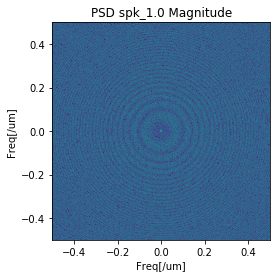

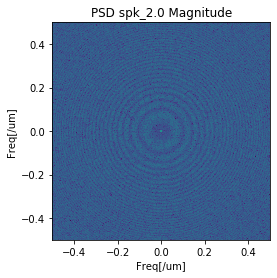

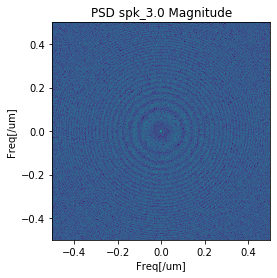

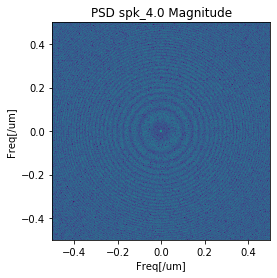

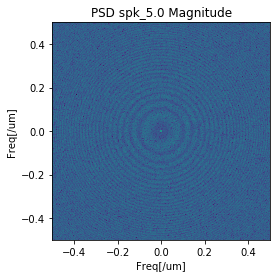

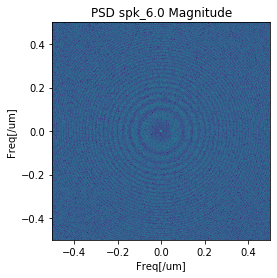

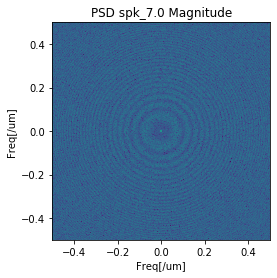

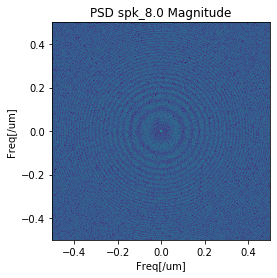

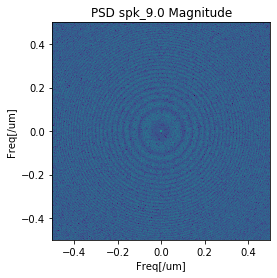

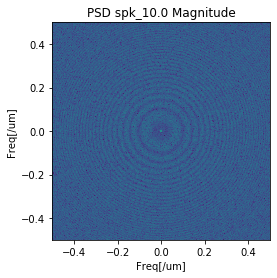

In [6]:
loop = np.linspace(1, 10, 10)
for i in loop:
    #print(im_dic['spk_' + str(i)])
    ftim(im_dic['spk_' + str(i)])
    #print(list(im_dic.keys())[list(im_dic.values()).index(i)])
#ftim(im_dic['spk_1'])
#ftim(im_dic['spk_2'])
#ftim(im_dic['spk_1.0'])
#ftim(im_dic['spk_2.0'])
#ftim(im_dic['spk_3.0'])
#ftim(im_dic['spk_4.0'])
#ftim(im_dic['spk_5.0'])
#ftim(im_dic['spk_6.0'])
#ftim(im_dic['spk_7.0'])
#ftim(im_dic['spk_8.0'])
#ftim(im_dic['spk_9.0'])
#ftim(im_dic['spk_10.0'])

### 4. Circle Sum

In [7]:
def circsum(spk_num):
    
    import numpy as np
    import matplotlib.pyplot as plt
    import supreme as sp

    
    (dx_m, Dx_m, f_cpm, px_size_m, x_m, Nfft, df_cpm, Df_cpm) = sp.setfreq(1*10**-6, 1e-3-1e-6)
    #FIX ME!!!!!!!
    
    print(np.shape(f_cpm))
    (Fx, Fy) = np.meshgrid(f_cpm, f_cpm)
    Z = Fx**2 + Fy**2    # Equation of a circule
    r = df_cpm * 100      # Radious of the ring
    dr = df_cpm * 1     # Thikness of the ring
#a = np.where(Z >= 10)
#a = np.where(np.abs(Z - 10) < 1) 
    a = np.where(np.abs(Z - r**2) < dr**2)   # Creates an array that contained zeros everywhere exept for the radii
    A = Z * 0
    A[a] = 1

    extent = (-Df_cpm/2 * 1e-6, +Df_cpm/2 * 1e-6, -Df_cpm/2 * 1e-6, +Df_cpm/2 * 1e-6)
    #FIX ME!!!!!!!!
    
    N = 500
    circ_sum_1 = np.zeros(N)
    for i in np.arange(N):
        r = df_cpm * i      # Radious of the ring
        dr = df_cpm     # Thikness of the ring
    #a = np.where(np.abs(Z - r**2) <= dr**2)   # Creates an array that contained zeros everywhere exept for the radii
        a = np.where((Z >= r**2) & (Z < (r + dr)**2))
        A = Z * 0
        A[a] = 1
        
        data_1 = np.asarray(spk_num) # Converts the image into a numpy array
        Y1 = np.fft.fftshift(np.fft.fft2(data_1))  # it rearranges the fourier transform to make it symetrical about zero

        circ_sum_1[i] = np.sum(np.abs(Y1) * A) / np.sum(A)
        temp_1 = np.sum(np.abs(Y1) *A)
    plt.plot(f_cpm[500:] * 1e-6, circ_sum_1)
    plt.ylim((0, 10000))
    plt.title(list(im_dic.keys())[list(im_dic.values()).index(spk_num)])
    plt.xlabel('Freq[/um]')
    plt.ylabel('Circular Sum of PSD')
    plt.show()
    return f_cpm[500:], circ_sum_1



(1000,)


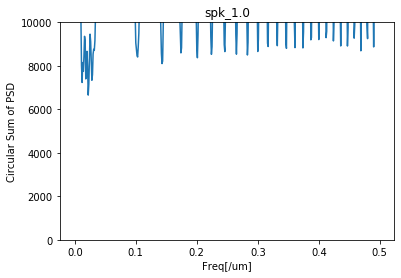

In [10]:
(fs_cpm, circ_sum) = circsum(im_dic['spk_' + str(1.0)])

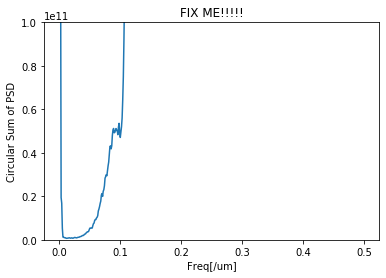

In [11]:
import matplotlib.pyplot as plt

mu = 0
sigma = 0.035e6
x = fs_cpm
g = 1/(sigma*np.sqrt(2*np.pi))*np.exp(-0.5*((x-mu)/sigma)**2) # Gaussian function formula

circ_sum_n = circ_sum / g
plt.plot(fs_cpm * 1e-6, circ_sum_n)
plt.ylim((0, 100000000000))
plt.title('FIX ME!!!!!')
plt.xlabel('Freq[/um]')
plt.ylabel('Circular Sum of PSD')
plt.show()

In [12]:
for i in loop:
    circsum(im_dic('spk_' + str(i))
#circsum(im_dic['spk_1'])
#circsum(im_dic['spk_2'])
#circsum(im_dic['spk_1'])
#circsum(im_dic['spk_2'])
#circsum(im_dic['spk_3'])
#circsum(im_dic['spk_4'])
#circsum(im_dic['spk_5'])
#circsum(im_dic['spk_6'])
#circsum(im_dic['spk_7'])
#circsum(im_dic['spk_8'])
#circsum(im_dic['spk_9'])
#circsum(im_dic['spk_10'])

SyntaxError: unexpected EOF while parsing (<ipython-input-12-2d8dfbd0576d>, line 14)

In [ ]:
def cross_sec(spk_num):
    
    import matplotlib as plt

    data_1 = np.asarray(spk_num)
    (width, height) = data_1.shape
    Y1 = np.fft.fftshift(np.fft.fft2(data_1))
    data_cross_x1 = np.abs(Y1[:, int(np.floor(height/2))])
    plt.plot(data_cross_x1)
    plt.title('PSD 1 Cross section')
    plt.xlabel('Freq[/um]')
    plt.ylabel('FT Magnitude')
    plt.ylim((0, .1e6))
    plt.show()
    
for i in loop:
    cross_sec(im_dic['spk_' + str(i)])
    #print(im_dic['spk_' + str(i)])

### 5. Curve fitting and optimization 

In [ ]:
def chirp_fit(freq, amp, offset):
    x = f_cpm[500:]
    chirp = lambda mod_freq, a, b: a * abs(np.sin(2*np.pi*mod_freq*x**2))**2 + b

    mod_freq = freq#0.01 * 1e-8 # Chirp frequency

    a = amp#5000 # Chirp amplitude
    b= offset#2000  # Chirp offset

    plt.plot(f_cpm[500:] * 1e-6, chirp(mod_freq, a, b), f_cpm[530:] * 1e-6, circ_sum_1[30:])
    plt.xlabel('Freq[/um]')
    plt.ylabel('Circular Sum of PSD')
    #plt.title('a chirp signal with f0=%1.1f' %f0)
    #plt.xlim((0, x[-1]))
    plt.ylim((0,10000))
    plt.show()

In [ ]:
chirp_fit(freq, amp, offset)


# Function test

In [ ]:

#print(dx_m)
#print(Dx_m)
#print(f_cpm)
#print(px_size_m)
#print(img_size_m)
#print(x_m)